<a href="https://colab.research.google.com/github/alandai28/deep-learning/blob/master/CNN_Keras_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cifar-10 的所有圖片被分為 10 個類別 (以 0~9 數字作為 Label 之編碼) :  
0 : airplain (飛機)  
1 : automobile (汽車)
2 : bird (鳥)  
3 : cat (貓)  
4 : deer (鹿)  
5 : dog (狗)  
6 : frog (青蛙)  
7 : horse (馬)  
8 : ship (船)  
9 : truck (卡車)  
包含 6 萬筆 32*32 低解析度之彩色圖片, 其中 5 萬筆為訓練集; 1 萬筆為測試集

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print(X_train.shape) #(50000, 32, 32, 3)

(50000, 32, 32, 3)


In [ ]:
## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(X_train, X_test) 

## OneHot Label 由(None, 1)-(None, 10)
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(Y_train).toarray()
y_test=one_hot.transform(Y_test).toarray()

In [ ]:
classifier=Sequential()

#卷積組合
classifier.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(100,activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 1.6924 - accuracy: 0.4004
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 1.3138 - accuracy: 0.5329
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 1.1472 - accuracy: 0.5960
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 1.0507 - accuracy: 0.6322
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 0.9845 - accuracy: 0.6555
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 0.9295 - accuracy: 0.6753
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.8869 - accuracy: 0.6893
Epoch 8/100
500/500 [==============================] - 2s 4ms/step - loss: 0.8470 - accuracy: 0.7044
Epoch 9/100
500/500 [==============================] - 2s 4ms/step - loss: 0.8151 - accuracy: 0.7134
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 0.7890 - accura

In [ ]:
loss, accuracy = classifier.evaluate(x_test,y_test)
print('Total loss on Testiong Set : ',loss)
print('Accuracy of Testiong Set : ',accuracy)

# Save model
classifier.save('./CNN_Cifar10.h5')

313/313 [==============================] - 1s 2ms/step - loss: 1.2664 - accuracy: 0.7100
Total loss on Testiong Set :  1.2663596868515015
Accuracy of Testiong Set :  0.7099999785423279


In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd

# Load Model
model = load_model('./CNN_Cifar10.h5')

# Display
def plot_img(n):
    plt.imshow(X_test[n], cmap='gray')
    plt.show()
    
def all_img_predict(model):
    print(model.summary())
    loss, accuracy = model.evaluate(x_test, y_test)
    print('Loss:', loss)
    print('Accuracy:', accuracy)
    predict = model.predict_classes(x_test)
    print(pd.crosstab(Y_test.reshape(-1), predict, rownames=['Label'], colnames=['predict']))

def one_img_predict(model, n):
    predict = model.predict_classes(x_test)
    print('Prediction:', predict[n])
    print('Answer:', Y_test[n])
    plot_img(n)

In [ ]:
all_img_predict(model)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)             

Prediction: 5
Answer: [3]


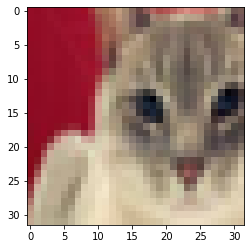

In [ ]:
one_img_predict(model, 3247)